In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
import scipy.stats as st


data = pd.read_csv ("BKB.csv")
married = data[data['Marital Status'] == 'Married']
unmarried = data[data['Marital Status'] != 'Married']




# Bernoulli Distribution

This is a single trial. The trial can result in one of the two possible outcomes
 labelled as success and failure. Given, any probability space, for any event(set
 of outcomes), it is possible to define a bernoulli trial, corresponding to whether
 the event occured or not.
#### X~Bernoulli(P)
#### What is the probability that any given person is married?


In [2]:
totalcount = len(data.index)
married_people = len(married.index)
unmarried = totalcount - married_people
marriedprob = married_people/totalcount
unmarriedprob = unmarried/totalcount
print("Probability of a person being married:",marriedprob)
print("Probability of person being unmarried:",unmarriedprob)

Probability of a person being married: 0.9013975155279503
Probability of person being unmarried: 0.0986024844720497





# Binomial Distribution:

A total of n bernoulli trials are conducted each with the success probability
equal to P. This is similar to the sum of n random variables. The assumptions
here is that each trial has only 2 possible outcomes and they are
independent.

#### X~Bin(n,P)

#### What is the probability that any 5 people selected will be married?


In [3]:
probability = math.comb(5,5)*((marriedprob)**5)
print("Probability of 5 people being married:",probability)

Probability of 5 people being married: 0.5950888095468454




# Normal Distribution:

### It is defined as a continous frequency distribution of infinte range.
It is a descriptive model that will describe real world situations. We can say that a
variable is normally distributed with mean μ and standard deviation σ, if the
probability density curve is a Gaussian curve/Bell Shaped curve. 

#### Therefore, we first would need to visualize the histogram to find out if the random variable we are considering is actually in a normal distribution or not.



array([[<AxesSubplot:title={'center':'Applicant ID'}>,
        <AxesSubplot:title={'center':'No of years in the current address'}>,
        <AxesSubplot:title={'center':'No. of Years in the current job'}>],
       [<AxesSubplot:title={'center':'Monthly Salary'}>,
        <AxesSubplot:title={'center':'Balance in Savings Account'}>,
        <AxesSubplot:title={'center':'Loan Amount Requested'}>],
       [<AxesSubplot:title={'center':'Term'}>,
        <AxesSubplot:title={'center':'Down Payment '}>,
        <AxesSubplot:title={'center':'EMI Affordable '}>]], dtype=object)

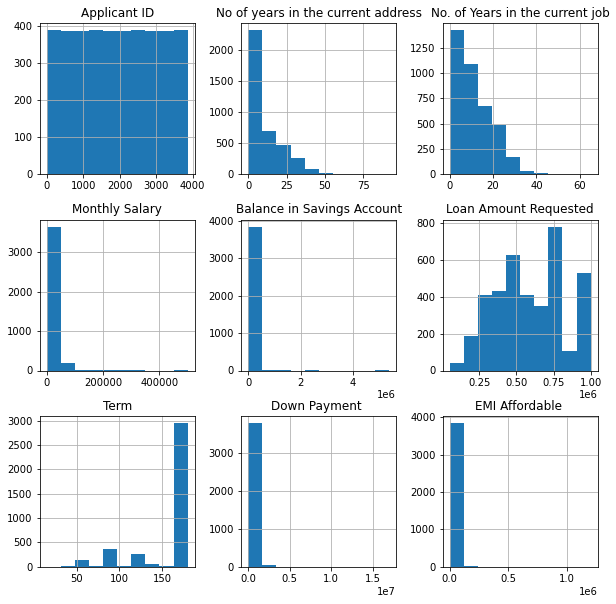

In [4]:
data.hist(figsize = (10,10))


#### What is the probability that the monthly salary would be less than 10,000 for any given person?


In [5]:
data["Monthly Salary"].describe()

count      3864.000000
mean      22618.984472
std       19783.322389
min           0.000000
25%       12200.750000
50%       19000.000000
75%       28500.000000
max      500000.000000
Name: Monthly Salary, dtype: float64

In [10]:
print("We know the mean is ",data["Monthly Salary"].mean()," and the standard deviation is", data["Monthly Salary"].std())
print("The value for which whose probability we want to check is below 10,000")
zvalue = (10000-data["Monthly Salary"].mean())/data["Monthly Salary"].std()
zprob = scipy.stats.norm.cdf(zvalue)
print("The probability of the monthly salary below 10,000 is ",zprob)

We know the mean is  22618.98447204969  and the standard deviation is 19783.32238934667
The value for which whose probability we want to check is below 10,000
The probability of the monthly salary below 10,000 is  0.2617825002654759



#### What is the probability that the monthly salary would be between 7,000 and 12,000 for any given person?


In [11]:
data["Monthly Salary"].describe()

count      3864.000000
mean      22618.984472
std       19783.322389
min           0.000000
25%       12200.750000
50%       19000.000000
75%       28500.000000
max      500000.000000
Name: Monthly Salary, dtype: float64

In [13]:
print("We know the mean is ",data["Monthly Salary"].mean(),"and the standard deviation is", data["Monthly Salary"].std())
print("The value for which whose probability we want to check is between 7,000 to 12,000")
zvalue1 = (7000 - data["Monthly Salary"].mean())/data["Monthly Salary"].std()
zvalue2 = (12000 - data["Monthly Salary"].mean())/data["Monthly Salary"].std()
zprob1 = scipy.stats.norm.cdf(zvalue1)
zprob2 = scipy.stats.norm.cdf(zvalue2)
finalprob = zprob2-zprob1
print("The probability of the monthly salary between 7,000 and 12,000 is ",finalprob)

We know the mean is  22618.98447204969 and the standard deviation is 19783.32238934667
The value for which whose probability we want to check is between 7,000 to 12,000
The probability of the monthly salary between 7,000 and 12,000 is  0.08080600470497273



# Confidence Intervals:

Confidence intervals are intervals in which we have a certain confidence to find
the real value of the observable we measure. In data science and statistics,
confidence intervals are very useful to give a scientific result of our measure,
that can be used by other scientists to compare their results with ours.

### x̄ ± z* σ / (√n),

#### In our dataset, we will try to find out the confidence interval for the Monthly Salary variable.


In [14]:
st.norm.interval(alpha = 0.95, loc=np.mean(data["Monthly Salary"]), scale=st.sem(data["Monthly Salary"]))

(21995.208329338275, 23242.760614761108)

In [15]:
st.norm.interval(alpha=0.99, loc=np.mean(data["Monthly Salary"]), scale=st.sem(data["Monthly Salary"]))

(21799.20365978756, 23438.765284311823)

In [16]:
st.norm.interval(alpha=0.80, loc=np.mean(data["Monthly Salary"]), scale=st.sem(data["Monthly Salary"]))

(22211.119175265278, 23026.849768834105)


# Central Limit Theorem:

Central Limit Theorem states that the distribution of sample means that is
calculated from sampling will follow normal distribution as the size of 'n'
regardless of the samples that may be drawn from the population. 

The core point here is that the sample mean itself is a random variable, which is
dependent on the sample observations. Like any other random variable in
statistics, the sample mean ( ̄x) also has a probability distribution, which shows
the probability densities for different values of the sample mean.


### Then, the Central Limit Theorem states that given a high enough sample size, the following properties hold true: Sampling distribution's mean = Population mean (μ), and Sampling distribution's standard deviation (standard error) = σ/√n, such that for n ≥ 30, the sampling distribution tends to a normal distribution for all practical purposes.

Logarithmic Distribution


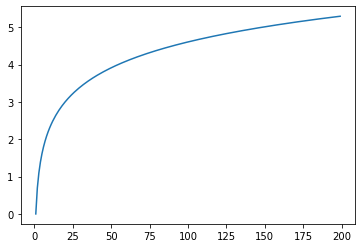

sample size =  2 using 10000 samples


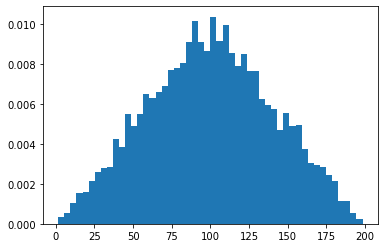

sample size =  4 using 10000 samples


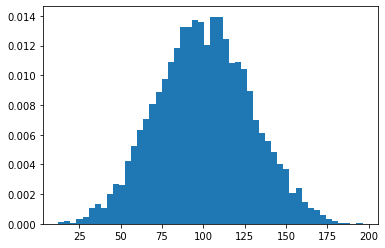

sample size =  10 using 10000 samples


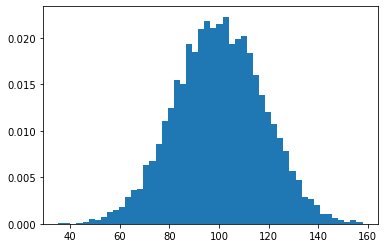

sample size =  100 using 10000 samples


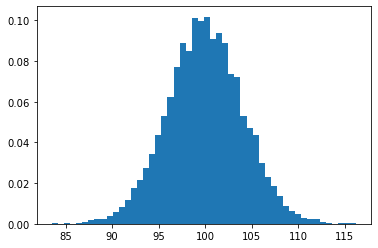

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from random import sample
from statistics import mean


xs = range(200)[1:]
ys = [np.log(x) for x in xs]

print('Logarithmic Distribution')

plt.plot(xs, ys)
plt.show()

for sample_number in [2,4,10,100]:
    s_xs = [sample(xs, sample_number) for i in range(10000)]
    means = []
    for s_x in s_xs:
        means.append(mean(s_x))
    print('sample size = ', sample_number,"using 10000 samples")
    plt.hist(means, 50, density=True)
    plt.show()

Uniform Distribution


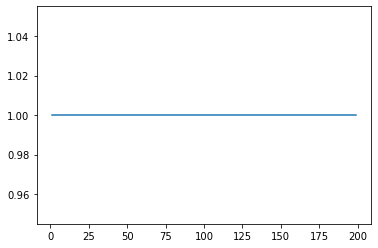

Sample Size =  2 using 10000 samples


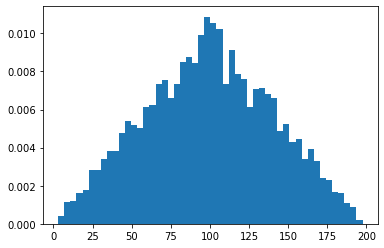

Sample Size =  4 using 10000 samples


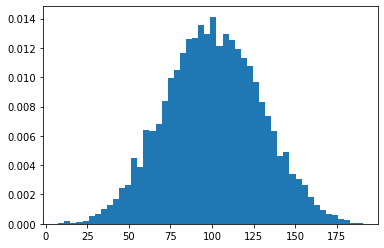

Sample Size =  10 using 10000 samples


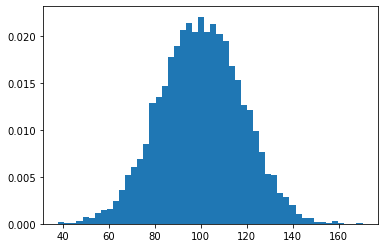

Sample Size =  100 using 10000 samples


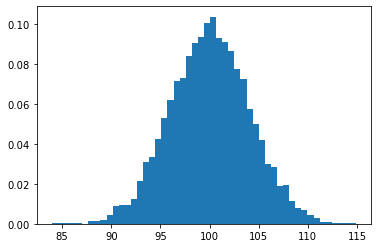

In [2]:
xs = range(200)[1:]
ys = [1 for x in xs]
print('Uniform Distribution')
plt.plot(xs, ys)
plt.show()
for sample_number in [2, 4, 10,100]:
    s_xs = [sample(xs, sample_number) for i in range(10000)]
    means = []
    for s_x in s_xs:
        means.append(mean(s_x))
    print('Sample Size = ', sample_number,"using 10000 samples")
    plt.hist(means, 50, density=True)
    plt.show()